In [2]:
import pandas as pd
# Load the CSV file (adjust path if necessary)
data = pd.read_csv('./train.csv')  # Adjust the filename if different


In [3]:
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
data.tail()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0
58644,58644,31,75000,MORTGAGE,2.0,VENTURE,B,15000,11.11,0.20,N,5,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
data.shape

(58645, 13)

In [7]:
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [8]:
data.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [9]:
#print target classes and its count
data['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

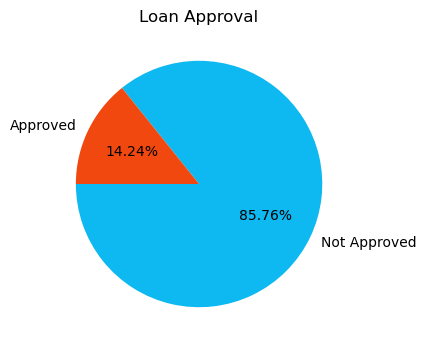

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (4, 4))

ax.pie(data.loan_status.value_counts(), labels = ["Not Approved", "Approved"],
       autopct = '%1.2f%%', startangle = 180, colors = ["#0EB8F1", "#F1480F"])

ax.set_title("Loan Approval")
plt.show()

##UnBalanced data

#Check Null Values

In [11]:
# Check for null values
null_values = data.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


#Check Duplicate Values

In [12]:
# Check for duplicates
duplicate_rows = data.duplicated().sum()
print("\nTotal Duplicate Rows:", duplicate_rows)


Total Duplicate Rows: 0


#Encode the Categorical Columns

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create DataFrame
df = pd.DataFrame(data)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Columns to be label encoded
categorical_columns = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file'
]

# Convert person_emp_length to int
df['person_emp_length'] = pd.to_numeric(df['person_emp_length'], errors='coerce').fillna(0).astype(int)

# Apply label encoding to categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
df.head()


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2,3,0,6000,6.92,0.10,0,3,0


In [14]:
df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership           int32
person_emp_length               int32
loan_intent                     int32
loan_grade                      int32
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int32
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [15]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

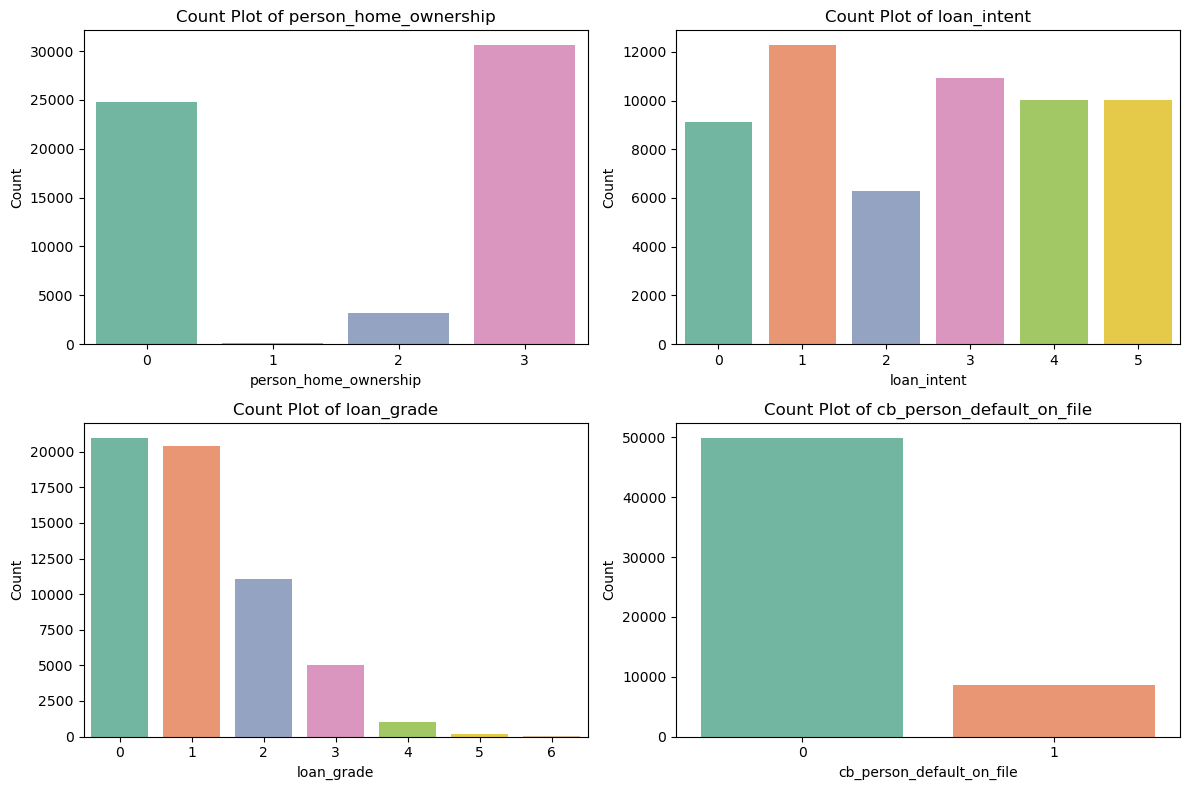

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the plot size
plt.figure(figsize=(12, 8))

# List of object-type columns to plot
object_columns = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file'
]

# Create count plots for each object column
for i, column in enumerate(object_columns):
    plt.subplot(2, 2, i + 1)  # Adjust subplot layout as needed
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

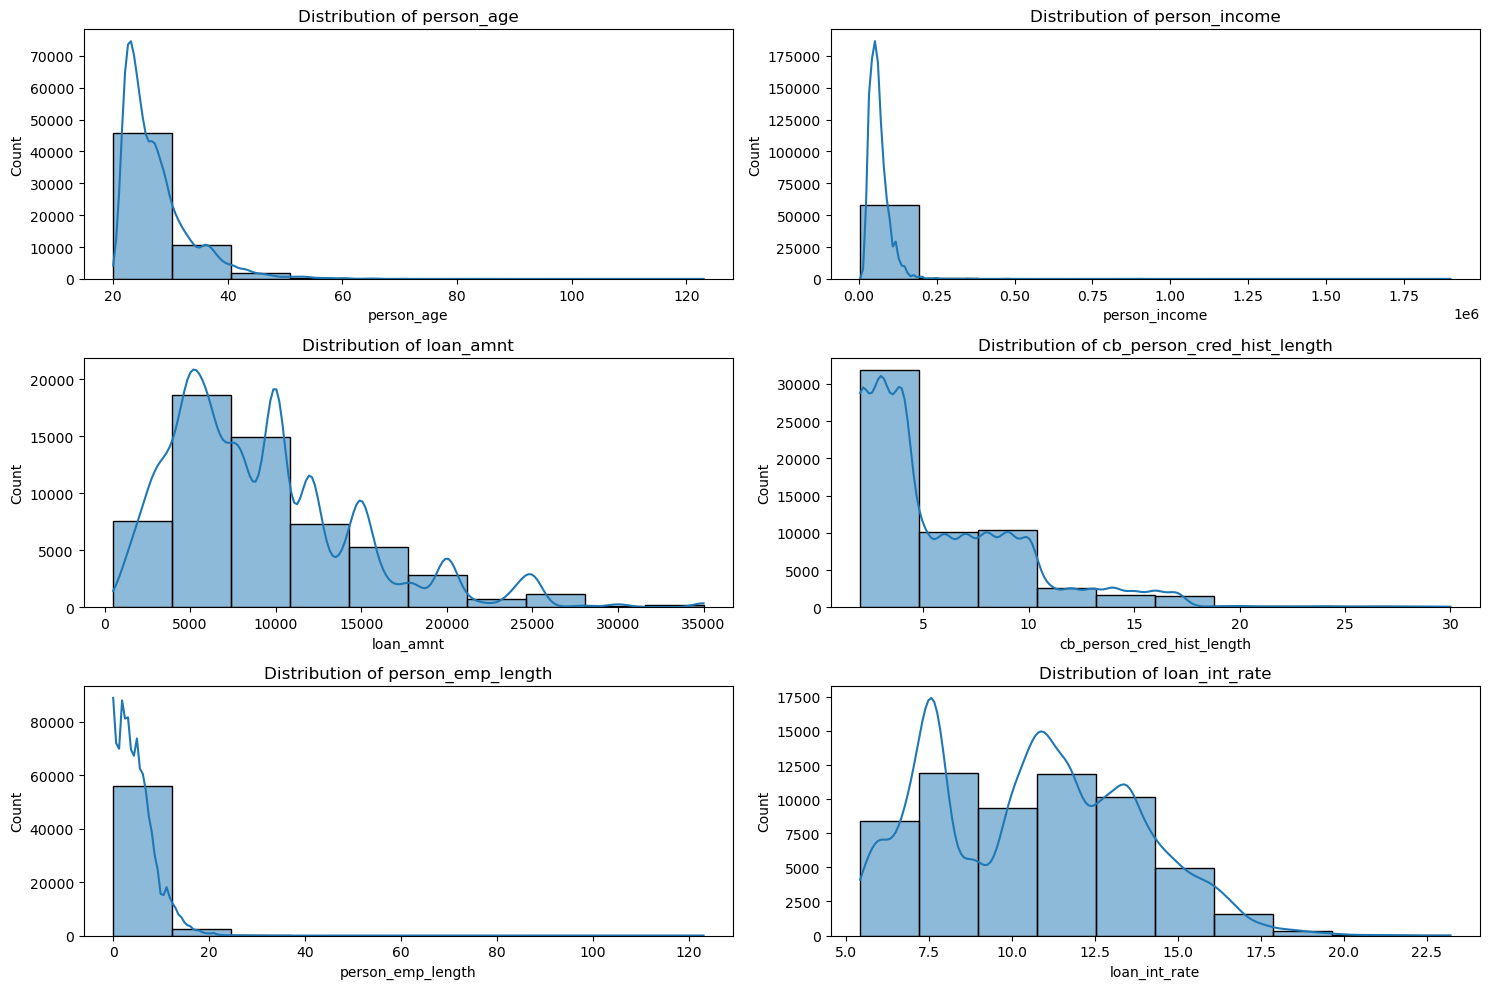

In [17]:
# List of integer columns to plot
int_columns = [
    'person_age',
    'person_income',
    'loan_amnt',
    'cb_person_cred_hist_length',
    'person_emp_length',
    'loan_int_rate'
]

# Set the plot size
plt.figure(figsize=(15, 10))

# Create count plots (histograms) for each integer column
for i, int_column in enumerate(int_columns):
    plt.subplot(3, 2, i + 1)  # Adjust subplot layout as needed
    sns.histplot(df[int_column], bins=10, kde=True, palette='Set2')  # Using histplot for count visualization
    plt.title(f'Distribution of {int_column}')
    plt.xlabel(int_column)
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
Summery = df.describe()
Summery

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,1.673578,4.701015,2.519430,1.066638,9217.556518,10.677874,0.159238,0.148384,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,1.452534,3.959784,1.722896,1.046181,5563.807384,3.034697,0.091692,0.355484,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,7.880000,0.090000,0.000000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,10.750000,0.140000,0.000000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,3.000000,7.000000,4.000000,2.000000,12000.000000,12.990000,0.210000,0.000000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,30.000000,1.000000


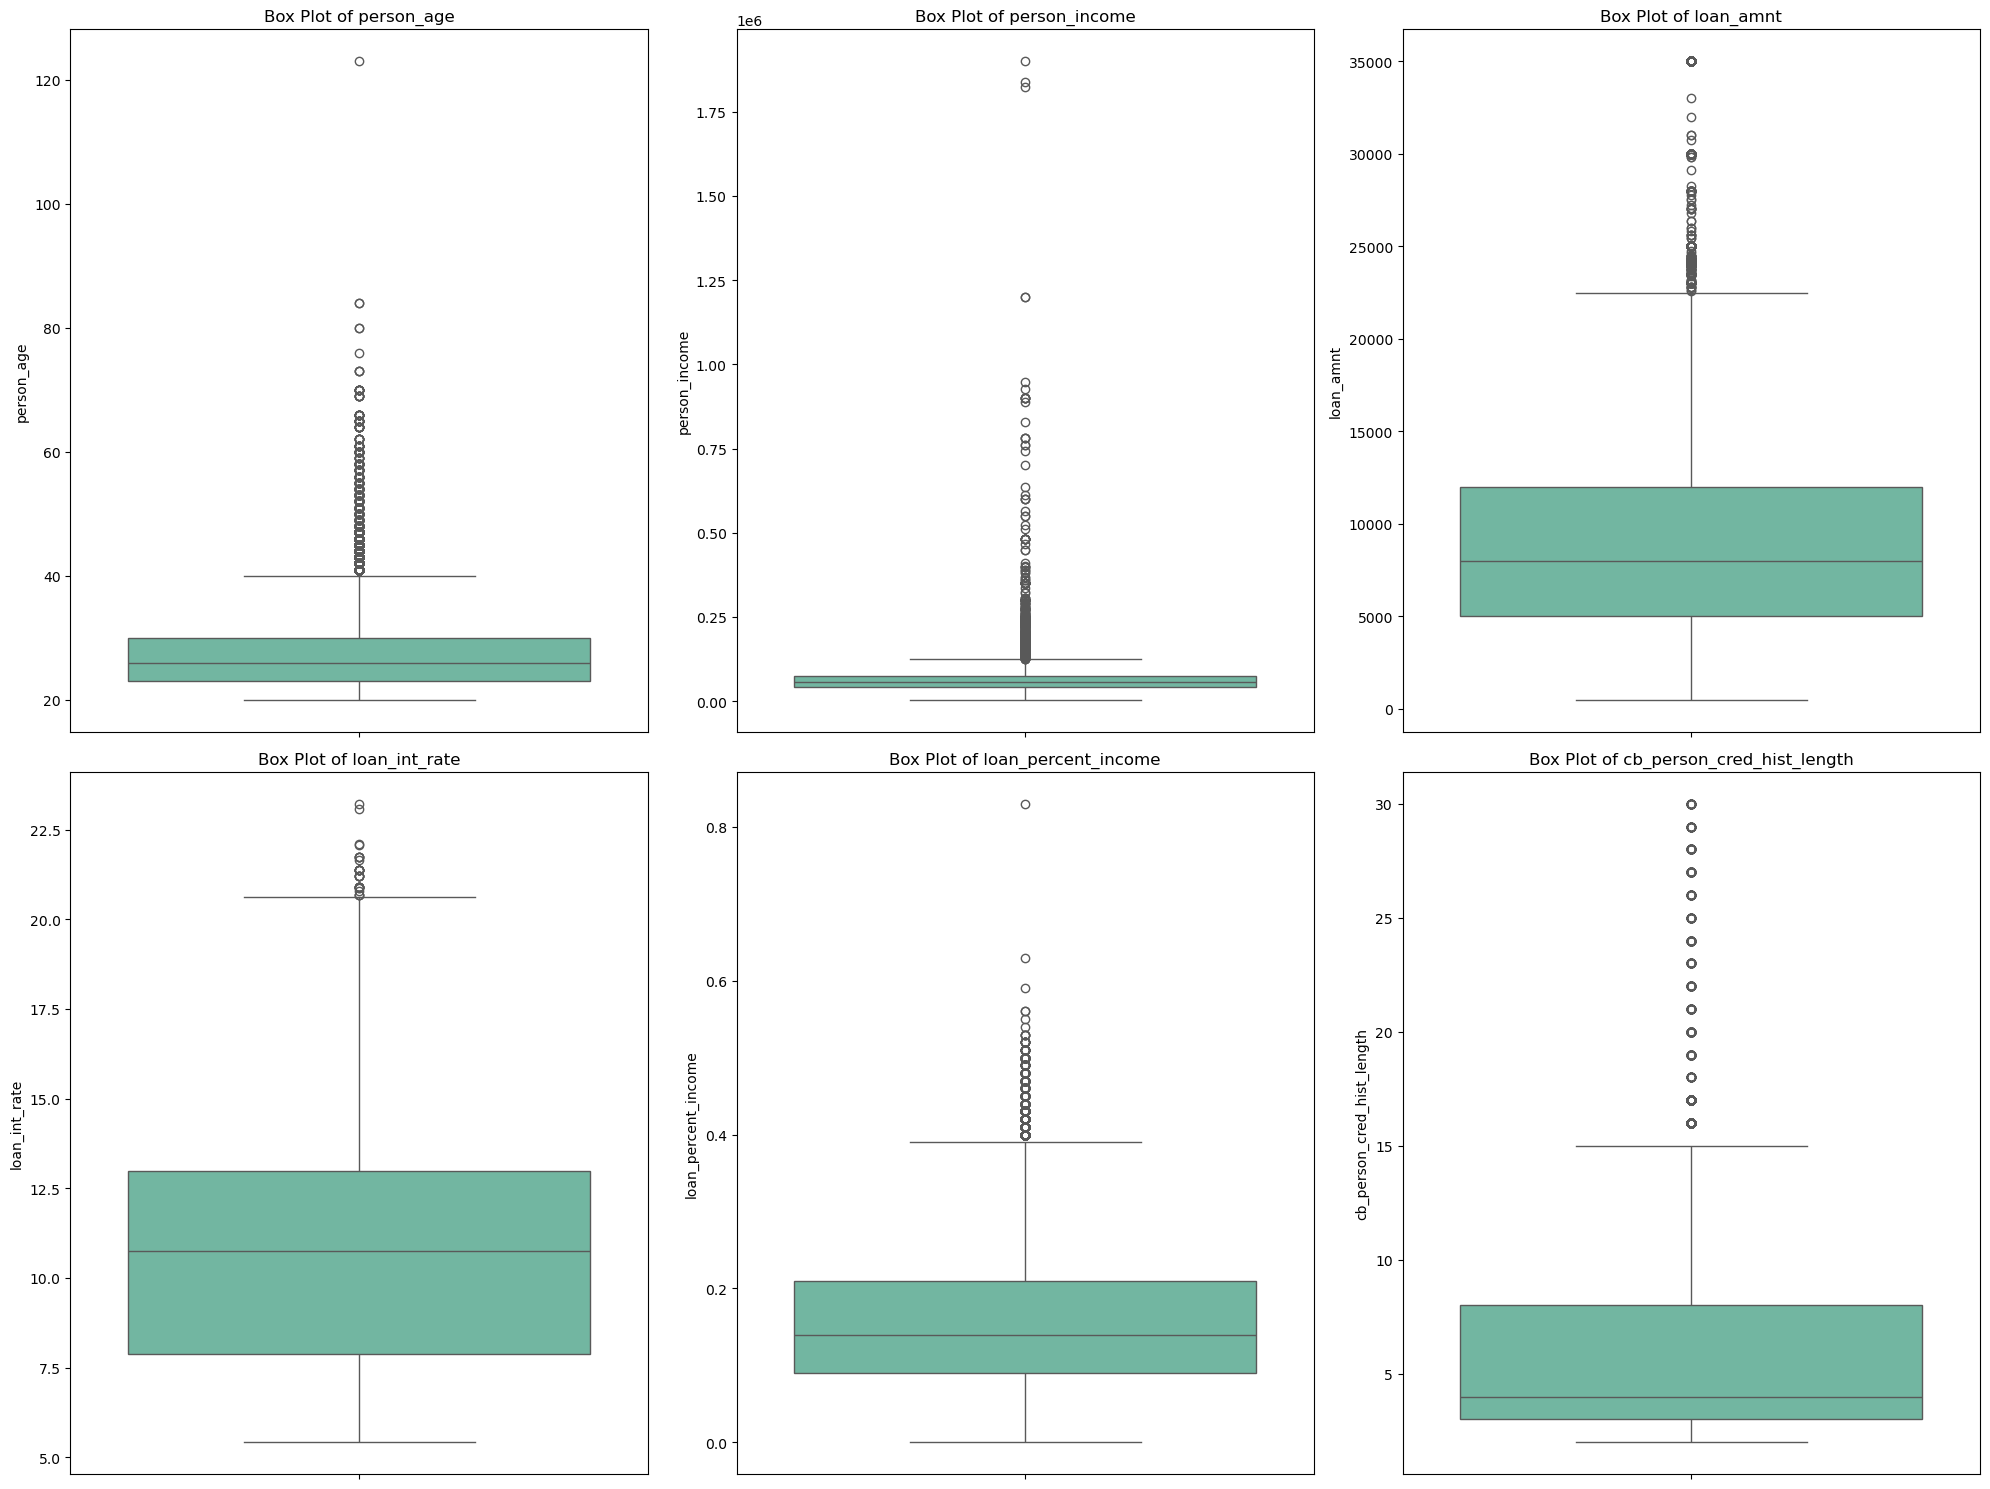

In [19]:
# Select numeric columns, excluding the first (id) and last (loan_status)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()[1:-1]  # Exclude first and last

# Set the plot size
plt.figure(figsize=(20, 15))

# Calculate the number of rows and columns for subplots
n = len(numeric_columns)
ncols = 3  # Set the number of columns
nrows = (n + ncols - 1) // ncols  # Calculate the number of rows needed

# Create box plots for each selected numeric column
for i, column in enumerate(numeric_columns):
    plt.subplot(nrows, ncols, i + 1)  # Adjust subplot layout dynamically
    sns.boxplot(data=df, y=column, palette='Set2')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

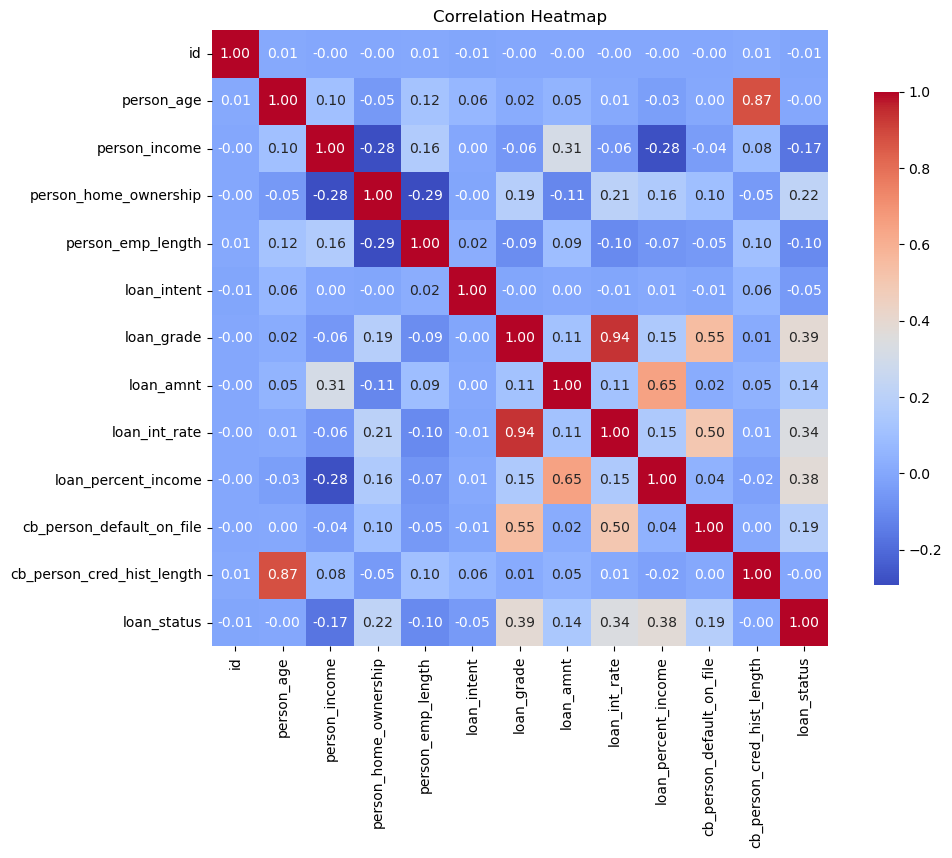

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title and labels
plt.title('Correlation Heatmap')
plt.show()

In [21]:
# Assuming `data` is your DataFrame
# Target variable
y = data['loan_status']

# Features (all columns except 'loan_status')
X = data.drop('loan_status', axis=1)


# Handle UnBalanced Data Using Down Sampling

In [22]:
import pandas as pd

# Combine X and y into a single DataFrame for easier sampling
data = pd.concat([X, y], axis=1)

# Separate the classes
minority_class = data[data['loan_status'] == 1]
majority_class = data[data['loan_status'] == 0]

# Randomly sample from the majority class to match the minority class size
majority_class_downsampled = majority_class.sample(n=len(minority_class), random_state=42)

# Concatenate the downsampled majority class with the minority class
balanced_data = pd.concat([minority_class, majority_class_downsampled])

# Separate features and target variable
X_resampled = balanced_data.drop('loan_status', axis=1)
y_resampled = balanced_data['loan_status']


In [23]:
# Shape of resampled features
print("Shape of X_resampled:", X_resampled.shape)

# Shape of resampled target
print("Shape of y_resampled:", y_resampled.shape)


Shape of X_resampled: (16700, 12)
Shape of y_resampled: (16700,)


In [24]:
# Check the data types of the columns
print(X_resampled.dtypes)

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


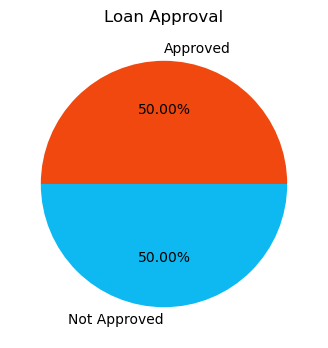

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (4, 4))

ax.pie(balanced_data.loan_status.value_counts(), labels = ["Not Approved", "Approved"],
       autopct = '%1.2f%%', startangle = 180, colors = ["#0EB8F1", "#F1480F"])

ax.set_title("Loan Approval")
plt.show()

In [26]:
df = pd.DataFrame(X_resampled)

# 1. Label Encoding
from sklearn.preprocessing import LabelEncoder

label_cols = ['cb_person_default_on_file', 'person_home_ownership', 'loan_intent', 'loan_grade']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for future use if needed

# 2. One-Hot Encoding (if necessary)
# df = pd.get_dummies(df, columns=['loan_intent', 'loan_grade'], drop_first=True)

# Display the DataFrame after encoding
print(df)

          id  person_age  person_income  person_home_ownership  \
11        11          22          33000                      3   
24        24          22          30000                      3   
25        25          25          25000                      3   
38        38          30          54000                      3   
39        39          22          32000                      3   
...      ...         ...            ...                    ...   
18299  18299          26          75000                      0   
1101    1101          40          60000                      3   
21120  21120          26          95000                      0   
4753    4753          23          52000                      0   
4110    4110          28          50000                      0   

       person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
11                   6.0            4           1      10000          11.12   
24                   3.0            3           3

In [27]:
df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership           int32
person_emp_length             float64
loan_intent                     int32
loan_grade                      int32
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int32
cb_person_cred_hist_length      int64
dtype: object

In [ ]:
import numpy as np
from scipy import stats

from sklearn.preprocessing import LabelEncoder
print("\nDataFrame after Label Encoding:")
print(df.head())

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outlier_mask_z = (z_scores > 3) 

outliers_z_score = df[(outlier_mask_z).any(axis=1)]
print("\nOutliers detected using Z-score method:")
print(outliers_z_score)

Q1 = df.describe().loc['25%']
Q3 = df.describe().loc['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



DataFrame after Label Encoding:
    id  person_age  person_income  person_home_ownership  person_emp_length  \
11  11          22          33000                      3                6.0   
24  24          22          30000                      3                3.0   
25  25          25          25000                      3                3.0   
38  38          30          54000                      3                0.0   
39  39          22          32000                      3                6.0   

    loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
11            4           1      10000          11.12                 0.30   
24            3           3       5000          16.49                 0.17   
25            5           2       3500          13.49                 0.14   
38            3           1      12500          11.71                 0.24   
39            1           3       8000          15.58                 0.25   

    cb_person_default_o

In [29]:
outliers_iqr = df[~((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]
print("\nOutliers detected using IQR method:")
print(outliers_iqr)


Outliers detected using IQR method:
          id  person_age  person_income  person_home_ownership  \
25        25          25          25000                      3   
55        55          29          34560                      3   
85        85          30          74000                      0   
98        98          29          34000                      3   
116      116          28          47000                      0   
...      ...         ...            ...                    ...   
54091  54091          23         130000                      0   
35912  35912          27         130000                      0   
40881  40881          43         100000                      0   
58149  58149          26         105000                      0   
21120  21120          26          95000                      0   

       person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
25                   3.0            5           2       3500          13.49   
55          

# Checking Outliers

<Figure size 1500x1000 with 0 Axes>

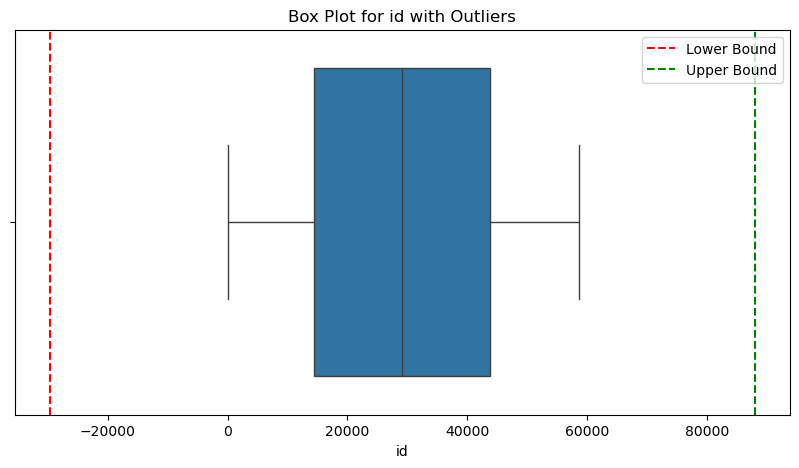

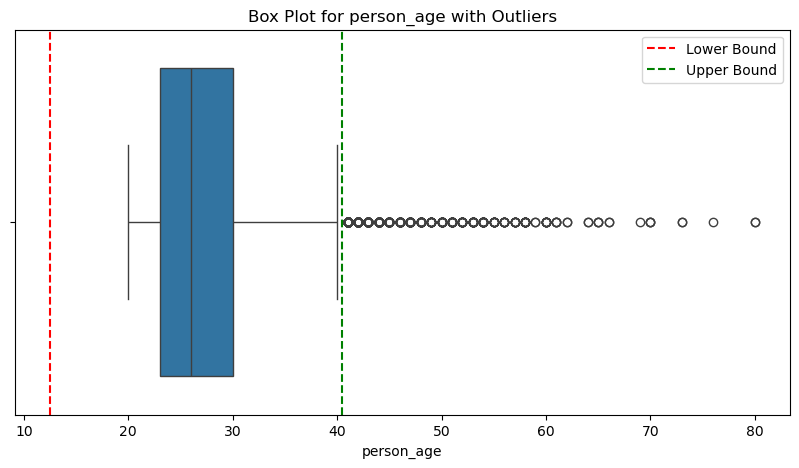

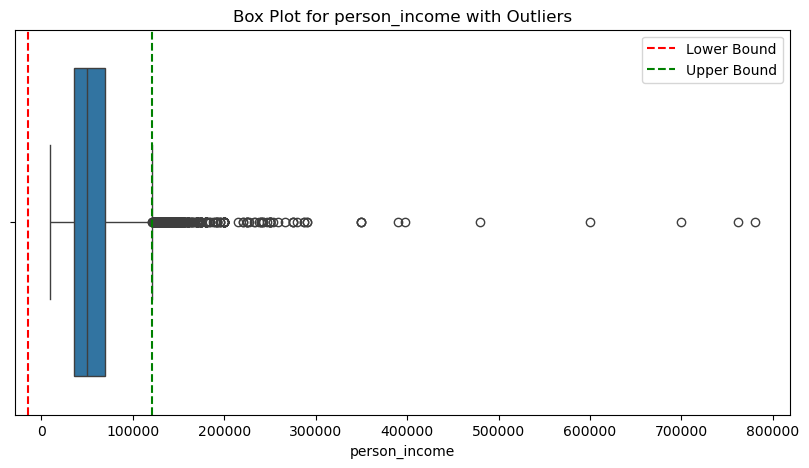

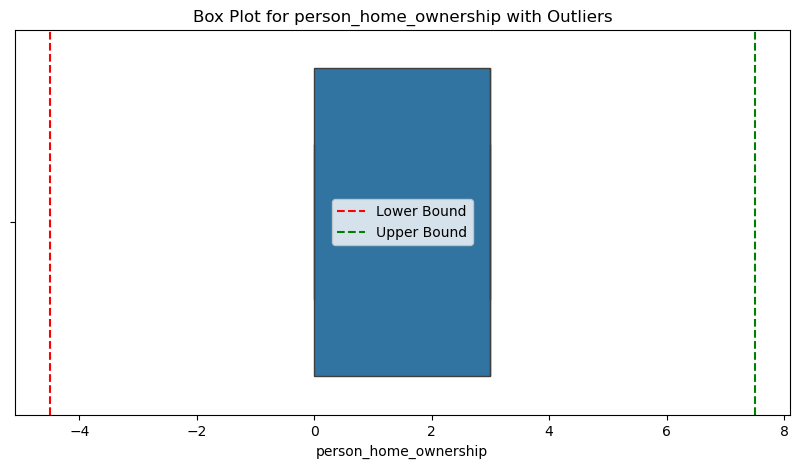

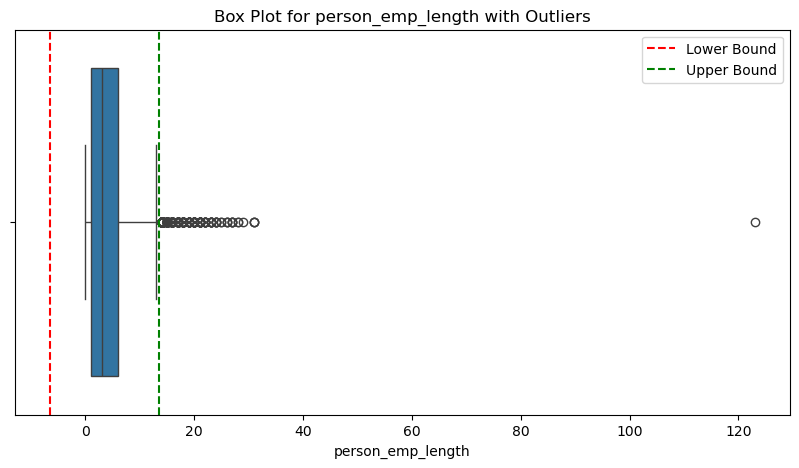

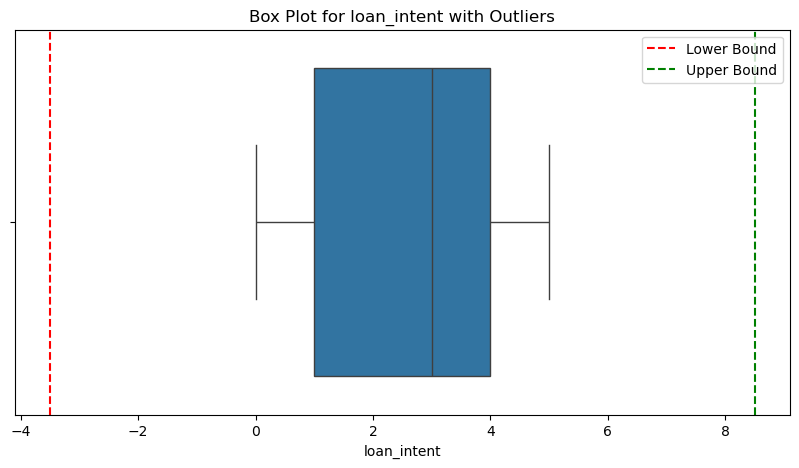

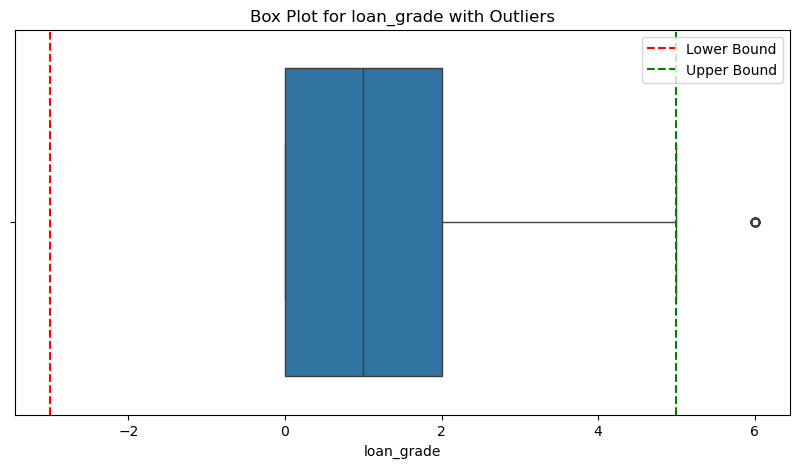

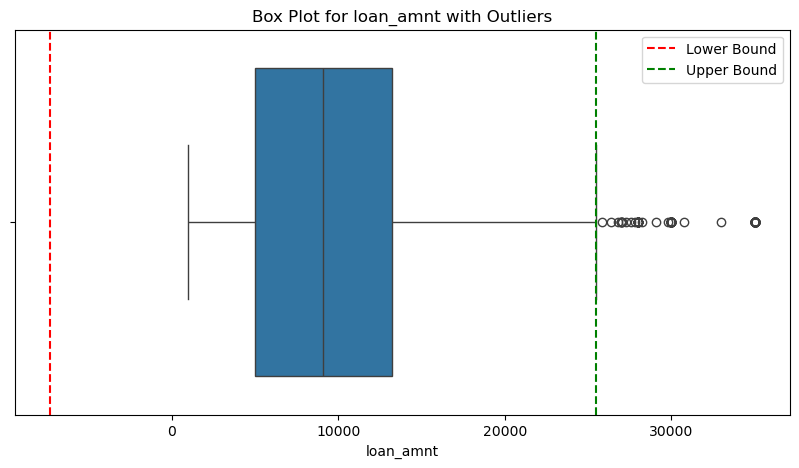

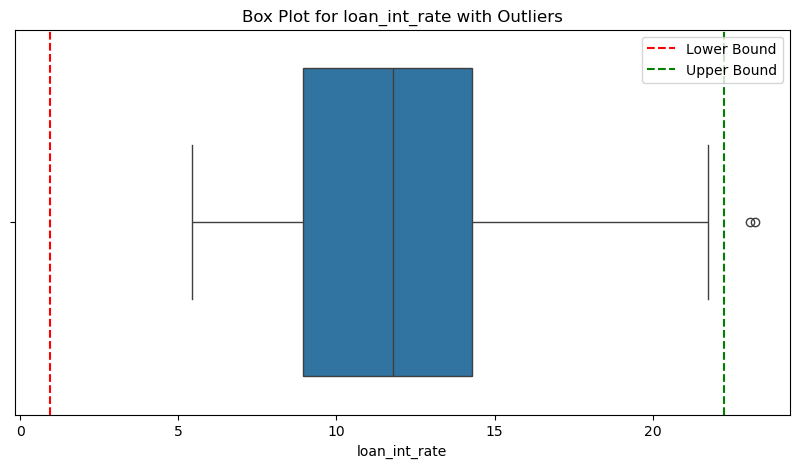

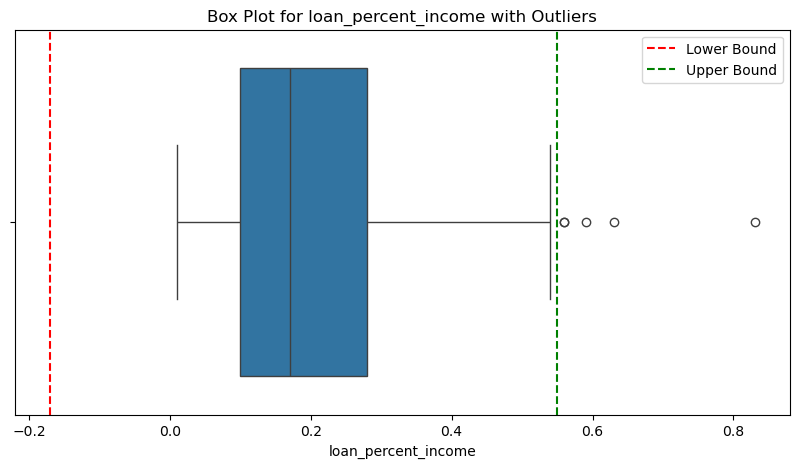

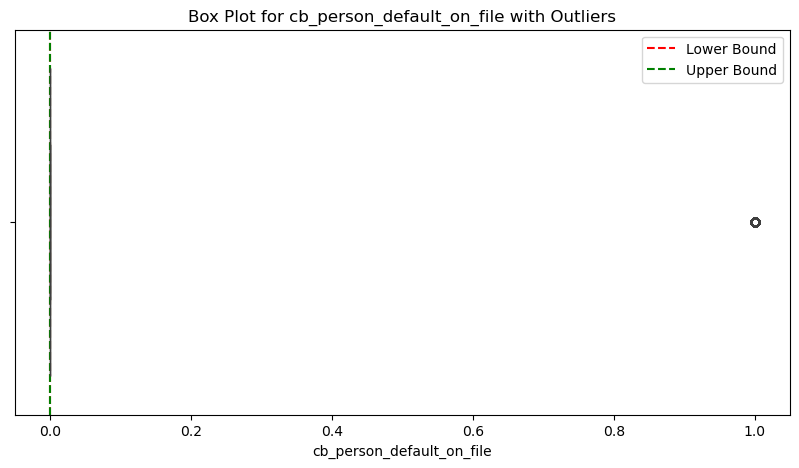

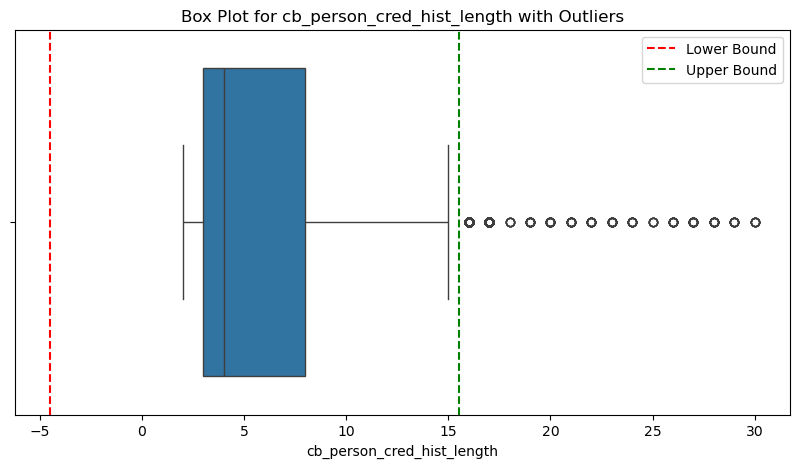

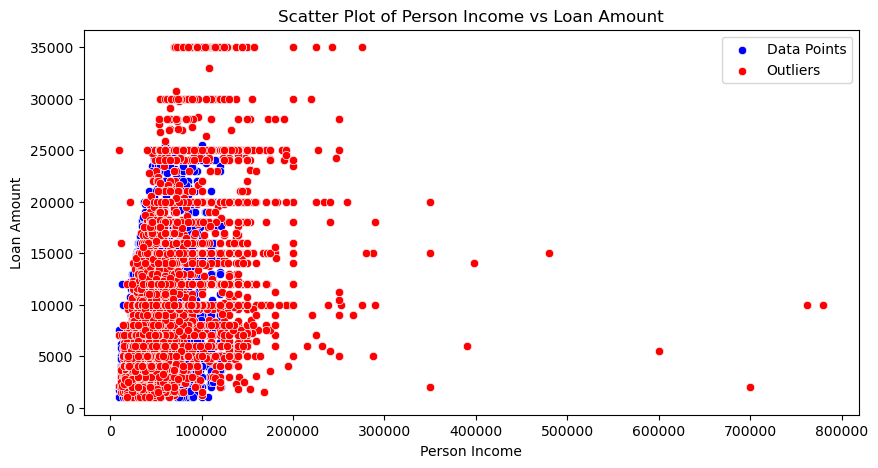

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Check for outliers using the IQR method
Q1 = df.describe().loc['25%']
Q3 = df.describe().loc['75%']
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 2. Identify outliers
outliers = df[~((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]

# 3. Plotting
plt.figure(figsize=(15, 10))

# Create box plots for numeric columns to visualize outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.axvline(x=lower_bound[col], color='red', linestyle='--', label='Lower Bound')
    plt.axvline(x=upper_bound[col], color='green', linestyle='--', label='Upper Bound')
    plt.title(f'Box Plot for {col} with Outliers')
    plt.xlabel(col)
    plt.legend()
    plt.show()

# Optional: Scatter plot for two specific variables to visualize relationships and outliers
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='person_income', y='loan_amnt', color='blue', label='Data Points')
sns.scatterplot(data=outliers, x='person_income', y='loan_amnt', color='red', label='Outliers')
plt.title('Scatter Plot of Person Income vs Loan Amount')
plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()


# Remove Outliers

In [31]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# 1. Check for outliers using the IQR method
Q1 = df.describe().loc['25%']
Q3 = df.describe().loc['75%']
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 2. Remove outliers
# Keep only the rows that are not outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Display the shape of the original and cleaned DataFrame
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")


Original shape: (16700, 12)
Cleaned shape: (11540, 12)


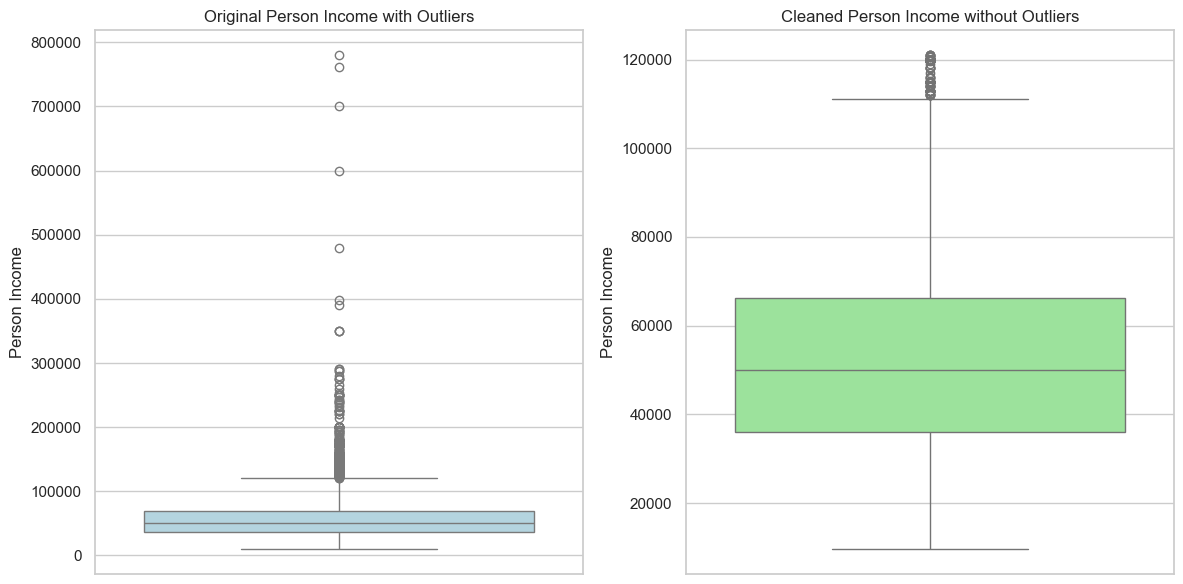

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(12, 6))

# Box plot for original DataFrame for person_income
plt.subplot(1, 2, 1)
sns.boxplot(y=df['person_income'], color='lightblue')
plt.title("Original Person Income with Outliers")
plt.ylabel("Person Income")

# Box plot for cleaned DataFrame for person_income
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['person_income'], color='lightgreen')
plt.title("Cleaned Person Income without Outliers")
plt.ylabel("Person Income")

# Show the plots
plt.tight_layout()
plt.show()


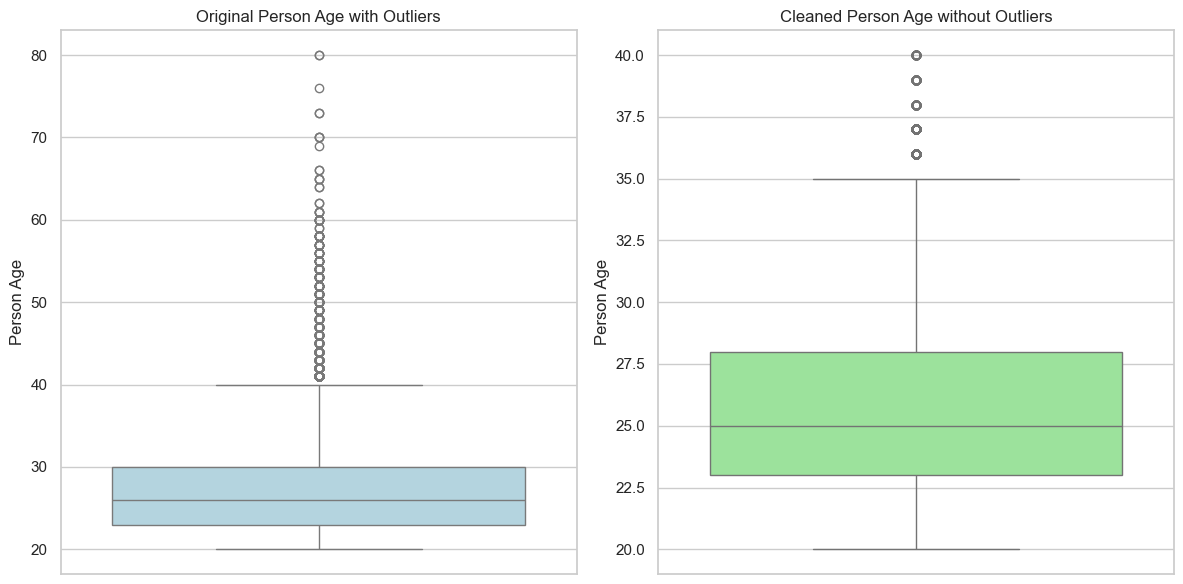

In [33]:
plt.figure(figsize=(12, 6))

# Box plot for original DataFrame for person_age
plt.subplot(1, 2, 1)
sns.boxplot(y=df['person_age'], color='lightblue')
plt.title("Original Person Age with Outliers")
plt.ylabel("Person Age")

# Box plot for cleaned DataFrame for person_age
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['person_age'], color='lightgreen')
plt.title("Cleaned Person Age without Outliers")
plt.ylabel("Person Age")

plt.tight_layout()
plt.show()


- The left plot ("Original Person Age with Outliers") shows the data before removing outliers, with several data points outside the typical range, especially above 40 years.
- The right plot ("Cleaned Person Age without Outliers") displays the data after outlier removal, resulting in a tighter interquartile range (IQR) and fewer extreme values.

The right plot should ideally have removed the most significant outliers while retaining the core distribution of the data. If this is what you intended, then the visualization effectively demonstrates the cleaned distribution of ages.

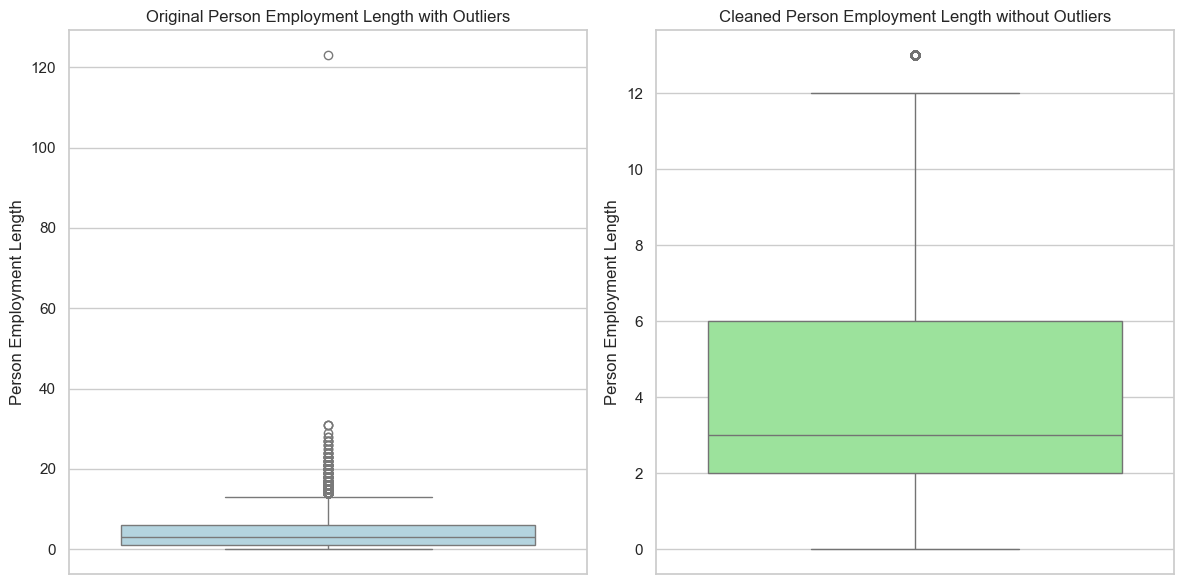

In [34]:
plt.figure(figsize=(12, 6))

# Box plot for original DataFrame for person_emp_length
plt.subplot(1, 2, 1)
sns.boxplot(y=df['person_emp_length'], color='lightblue')
plt.title("Original Person Employment Length with Outliers")
plt.ylabel("Person Employment Length")

# Box plot for cleaned DataFrame for person_emp_length
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['person_emp_length'], color='lightgreen')
plt.title("Cleaned Person Employment Length without Outliers")
plt.ylabel("Person Employment Length")

plt.tight_layout()
plt.show()


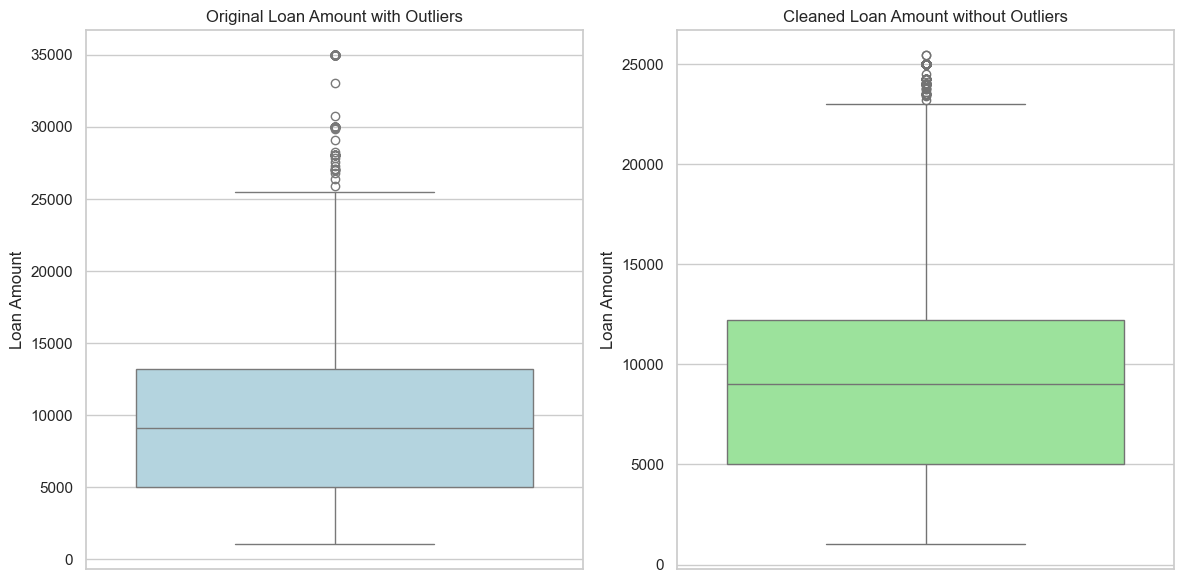

In [35]:
plt.figure(figsize=(12, 6))

# Box plot for original DataFrame for loan_amnt
plt.subplot(1, 2, 1)
sns.boxplot(y=df['loan_amnt'], color='lightblue')
plt.title("Original Loan Amount with Outliers")
plt.ylabel("Loan Amount")

# Box plot for cleaned DataFrame for loan_amnt
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['loan_amnt'], color='lightgreen')
plt.title("Cleaned Loan Amount without Outliers")
plt.ylabel("Loan Amount")

plt.tight_layout()
plt.show()


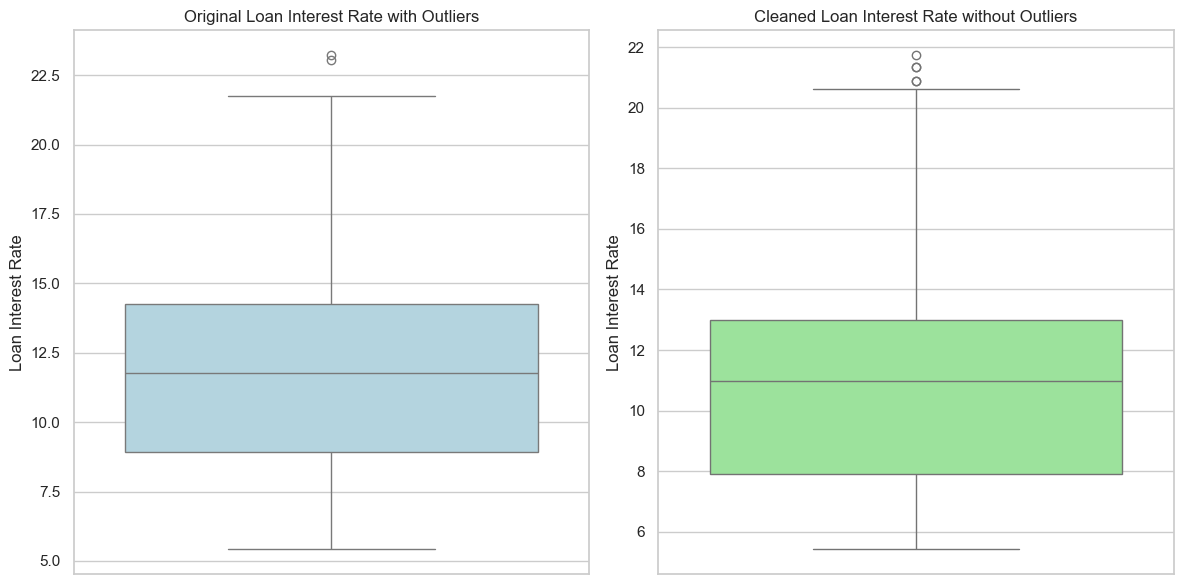

In [36]:
plt.figure(figsize=(12, 6))

# Box plot for original DataFrame for loan_int_rate
plt.subplot(1, 2, 1)
sns.boxplot(y=df['loan_int_rate'], color='lightblue')
plt.title("Original Loan Interest Rate with Outliers")
plt.ylabel("Loan Interest Rate")

# Box plot for cleaned DataFrame for loan_int_rate
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['loan_int_rate'], color='lightgreen')
plt.title("Cleaned Loan Interest Rate without Outliers")
plt.ylabel("Loan Interest Rate")

plt.tight_layout()
plt.show()


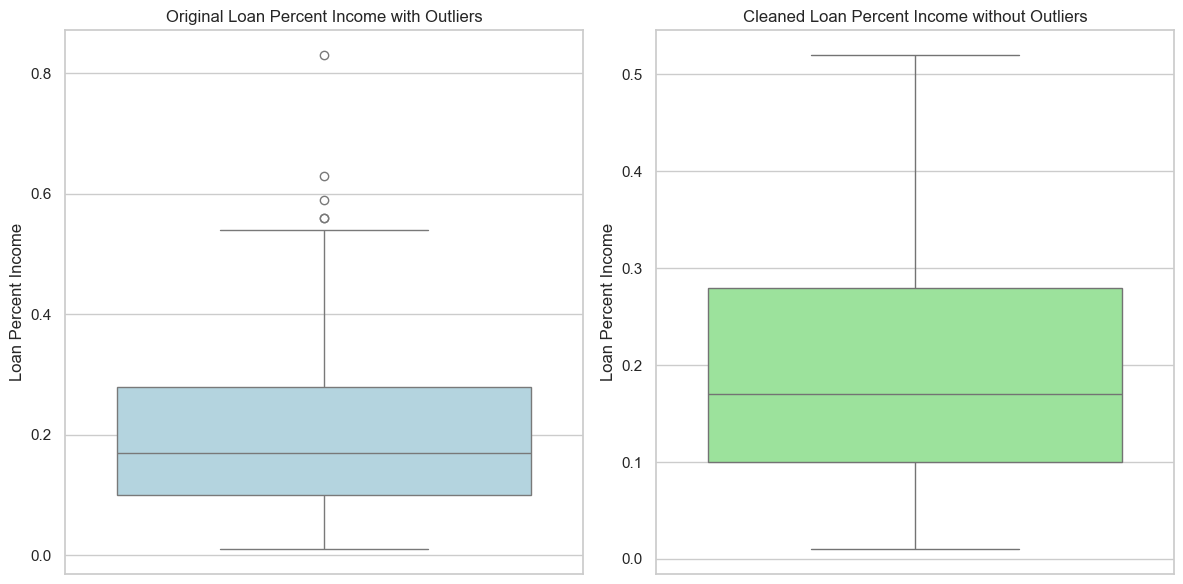

In [37]:
plt.figure(figsize=(12, 6))

# Box plot for original DataFrame for loan_percent_income
plt.subplot(1, 2, 1)
sns.boxplot(y=df['loan_percent_income'], color='lightblue')
plt.title("Original Loan Percent Income with Outliers")
plt.ylabel("Loan Percent Income")

# Box plot for cleaned DataFrame for loan_percent_income
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['loan_percent_income'], color='lightgreen')
plt.title("Cleaned Loan Percent Income without Outliers")
plt.ylabel("Loan Percent Income")

plt.tight_layout()
plt.show()


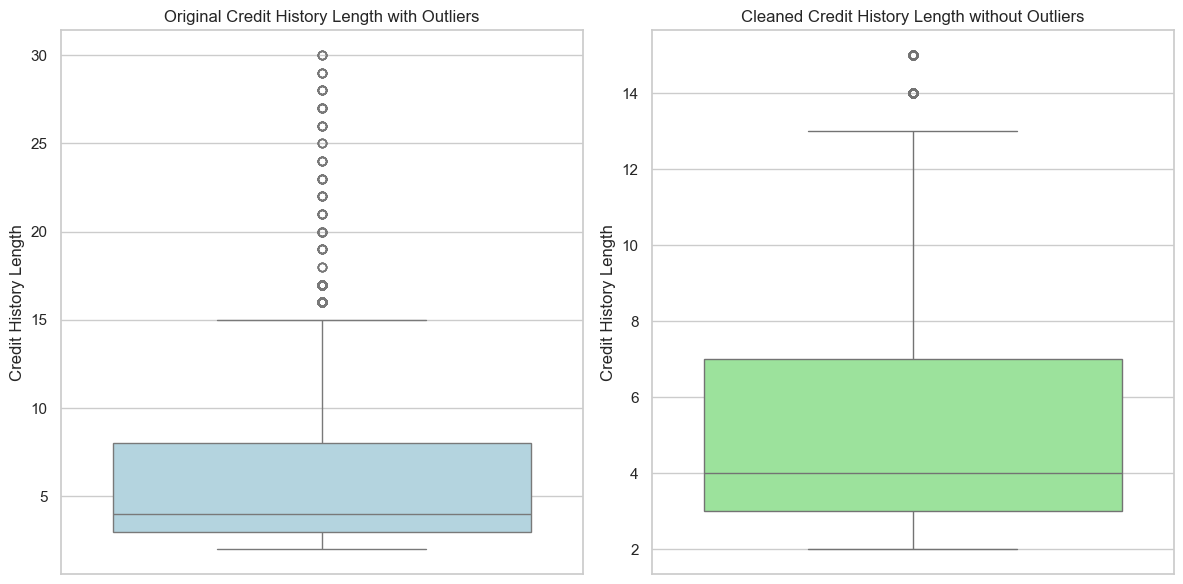

In [38]:
plt.figure(figsize=(12, 6))

# Box plot for original DataFrame for cb_person_cred_hist_length
plt.subplot(1, 2, 1)
sns.boxplot(y=df['cb_person_cred_hist_length'], color='lightblue')
plt.title("Original Credit History Length with Outliers")
plt.ylabel("Credit History Length")

# Box plot for cleaned DataFrame for cb_person_cred_hist_length
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['cb_person_cred_hist_length'], color='lightgreen')
plt.title("Cleaned Credit History Length without Outliers")
plt.ylabel("Credit History Length")

plt.tight_layout()
plt.show()


In [39]:
data_to_train = pd.merge(df, data[['id', 'loan_status']], on='id', how='left')

# Check the merged DataFrame
print(data_to_train.head())

   id  person_age  person_income  person_home_ownership  person_emp_length  \
0  11          22          33000                      3                6.0   
1  24          22          30000                      3                3.0   
2  25          25          25000                      3                3.0   
3  38          30          54000                      3                0.0   
4  39          22          32000                      3                6.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            4           1      10000          11.12                 0.30   
1            3           3       5000          16.49                 0.17   
2            5           2       3500          13.49                 0.14   
3            3           1      12500          11.71                 0.24   
4            1           3       8000          15.58                 0.25   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_statu

In [40]:
from sklearn.model_selection import train_test_split

X = data_to_train.drop('loan_status', axis=1)  # Replace 'target_column' with your actual target column name
y = data_to_train['loan_status']  # Replace 'target_column' with your actual target column name

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# Use mutual_info_classif for classification tasks or mutual_info_regression for regression tasks
# Replace X and y with your actual feature matrix and target variable

# For classification tasks
mi_score = mutual_info_classif(X, y, random_state=0)

# For regression tasks
# mi_score = mutual_info_regression(X, y, random_state=0)

# Display MI scores
print(mi_score)


[0.         0.00374005 0.17936183 0.07026887 0.02103983 0.01155748
 0.13478697 0.02797513 0.14338724 0.13466079 0.02653682 0.00100114]


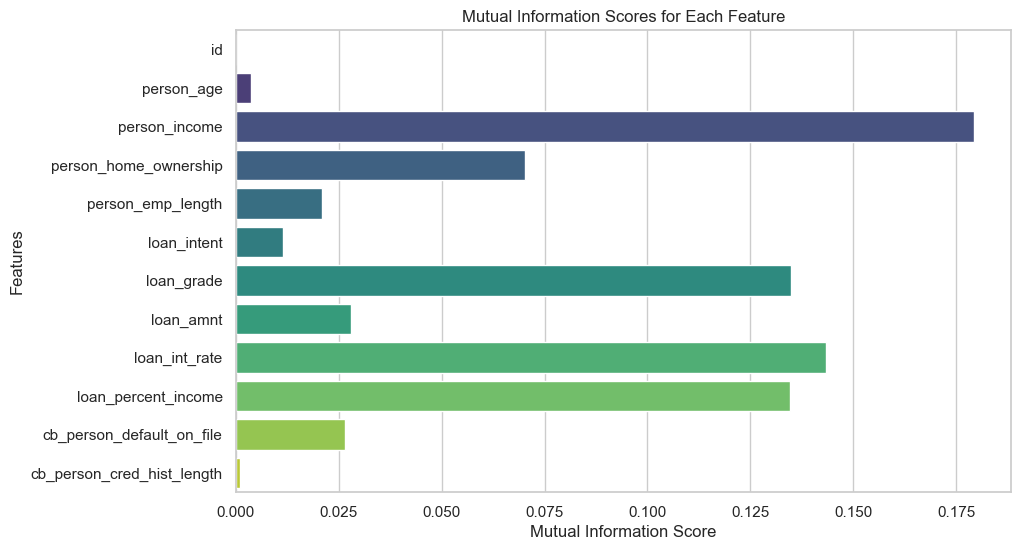

In [42]:
# Assuming X is a DataFrame, get the feature names
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(len(mi_score))]

# Create a bar plot of MI scores
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_score, y=feature_names, palette="viridis")
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores for Each Feature')
plt.show()

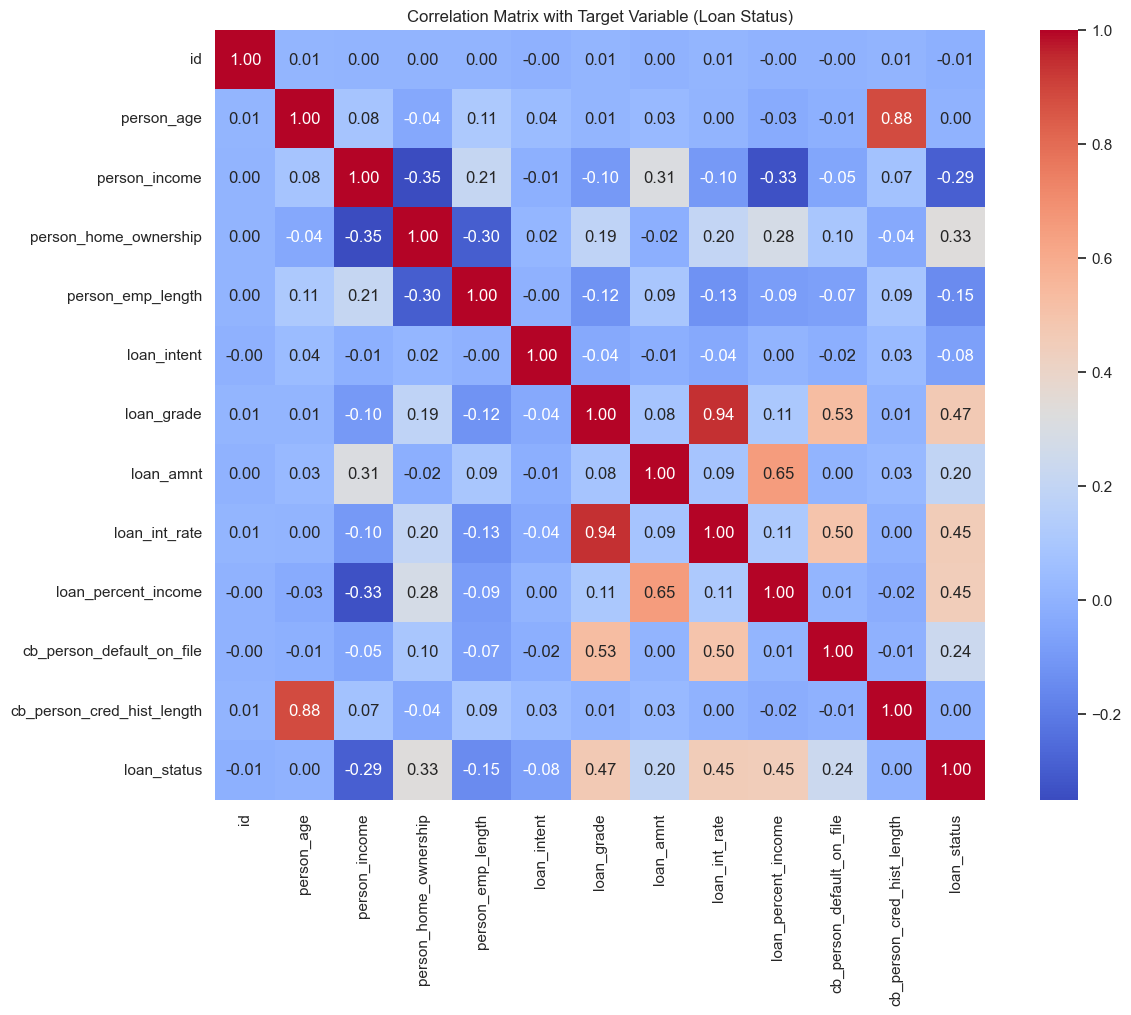

In [43]:
# Calculate the correlation matrix
correlation_matrix = data_to_train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True,
            mask=correlation_matrix['loan_status'].isnull())

# Set title and labels
plt.title("Correlation Matrix with Target Variable (Loan Status)")
plt.show()



## Feature Removal Analysis

Combining insights from both **Mutual Information Scores** and the **Correlation Matrix**, we can identify features that can be safely removed.

---

### 1. From the Correlation Matrix:
- **Features with very low correlation with `loan_status`**:
   - `person_age` (0.00 correlation)
   - `cb_person_cred_hist_length` (-0.02 correlation)
   - `id` (-0.01 correlation)  
   These features have almost no linear relationship with the target variable.

- **Features with high correlation to other features**:
   - `loan_grade` and `loan_int_rate` have a very high correlation (0.94). Retaining both might introduce **multicollinearity**.
   - `loan_amnt` has a moderately high correlation (0.65) with `loan_percent_income`, which suggests redundancy.

---

### 2. From the Mutual Information Scores:
- **Features with near-zero mutual information scores**:
   - `id` (close to 0)
   - `person_age` (very low)
   - `cb_person_cred_hist_length` (low)
   - `loan_intent` (low)

---

### 3. Final Analysis - Features to Remove:
Based on the combination of **low correlation** and **low mutual information scores**, the following features can be safely removed:

1. **`id`** - Irrelevant for prediction and has zero contribution.
2. **`person_age`** - Minimal correlation and mutual information.
3. **`cb_person_cred_hist_length`** - No significant relationship with `loan_status`.
4. **`loan_intent`** - Low mutual information and correlation.
5. **One of `loan_grade` or `loan_int_rate`** - Due to high correlation (0.94), keep only one to avoid redundancy.

---

### Summary:
The features for removal are:
- `id`
- `person_age`
- `cb_person_cred_hist_length`
- `loan_intent`
- `loan_int_rate`

The Features for Selected are:
- `person_income`
- `person_home_ownership`
- `person_emp_length`
- `loan_grade`
- `loan_amnt`
- `loan_percent_income`
- `cb_person_default_on_file`


## Visualizing Distributions of Selected Features with Loan Status

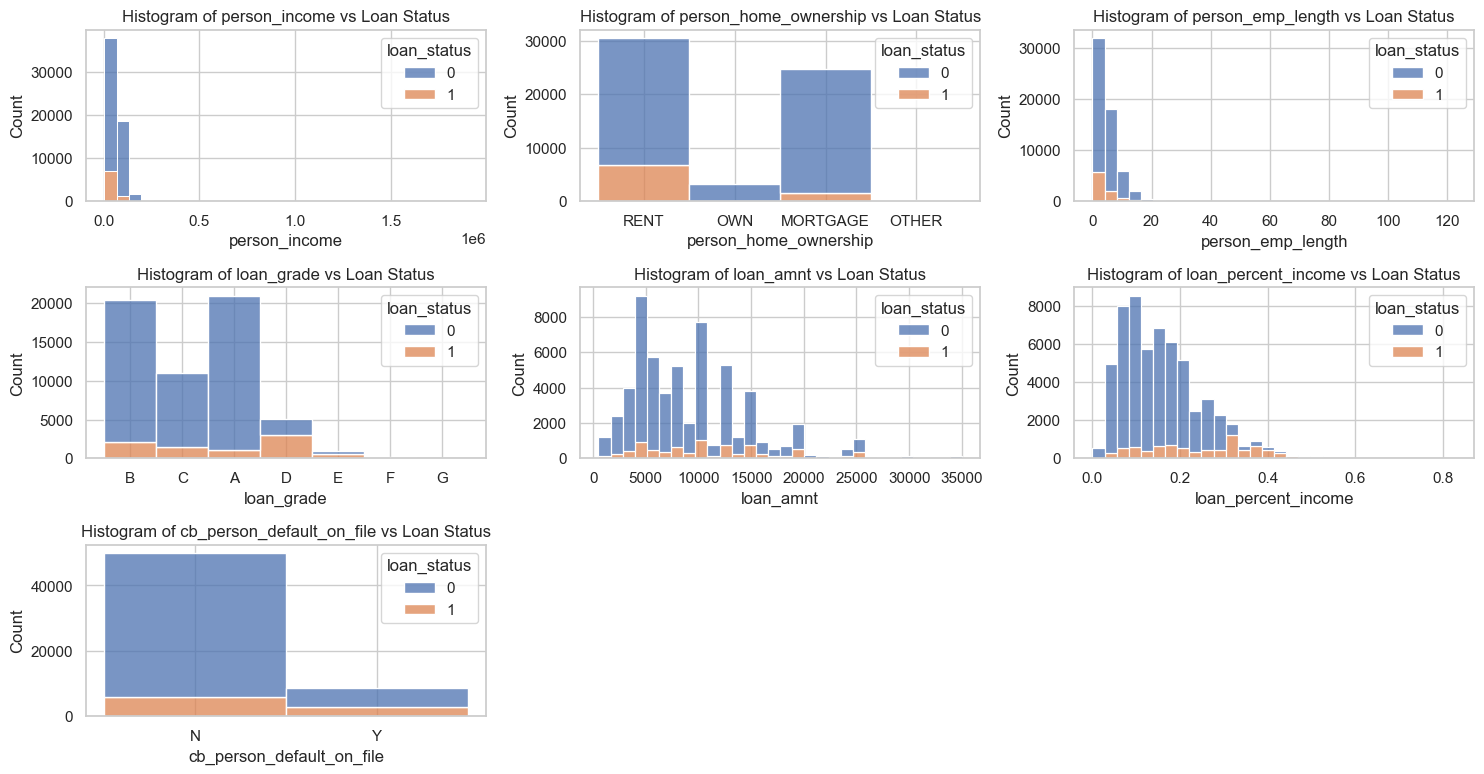

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'data' is a DataFrame (replace with your actual DataFrame name)
# cols_to_exclude contains all columns you want to exclude
cols_to_exclude = ['id', 'person_age', 'cb_person_cred_hist_length', 'loan_intent', 'loan_int_rate', 'loan_status']

# Select numerical columns after excluding unnecessary columns
cols_to_plot = data_to_train.drop(columns=cols_to_exclude)

# Create the histograms
plt.figure(figsize=(15, 10))  # Adjust figure size

# Loop through each column and plot
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(4, 3, i)  # 2 rows, 3 columns layout
    sns.histplot(data=data, x=col, hue="loan_status", multiple="stack", bins=30)
    plt.title(f'Histogram of {col} vs Loan Status')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()


These visualizations are histograms analyzing **loan status** (default vs non-default) in relation to multiple features. The loan status is divided into **two categories**:

- **0** = No default
- **1** = Default

Here are the observations for each histogram:

---

### 1. **Person Income vs Loan Status**
- **Observation**: Most individuals have lower income (concentrated on the left side).
- Loan defaults (orange bars) occur across all income levels but **decrease** as income increases.
- **Insight**: Higher income tends to correlate with fewer defaults.

---

### 2. **Person Home Ownership vs Loan Status**
- **Observation**:  
   - Most borrowers either **rent** or have a **mortgage**.  
   - Defaults are proportionally higher for renters compared to those with a mortgage or owning a home.  
- **Insight**: Renting individuals may have higher financial instability, leading to more defaults.

---

### 3. **Person Employment Length vs Loan Status**
- **Observation**: Employment lengths are concentrated between **0–20 years**.  
- Defaults are more frequent among borrowers with **shorter employment lengths**.  
- **Insight**: Shorter job stability could lead to higher chances of loan default.

---

### 4. **Loan Grade vs Loan Status**
- **Observation**: Loan grades **B, C, and A** are the most common.  
- Defaults are higher in lower loan grades like **D, E, F, and G**.  
- **Insight**: Lower loan grades (which represent higher risk) tend to have a greater share of defaults.

---

### 5. **Loan Amount vs Loan Status**
- **Observation**: Loan amounts are concentrated in the **$5,000 to $15,000 range**.  
- Defaults occur across all loan amounts but are slightly higher for **smaller loans**.  
- **Insight**: Borrowers with smaller loans may still default, possibly due to tighter financial conditions.

---

### 6. **Loan Percent Income vs Loan Status**
- **Observation**: Loan amounts relative to income (loan_percent_income) are generally low, with most values under **0.3 (30%)**.  
- Defaults are higher when the loan percent income is relatively **high**.  
- **Insight**: High loan-to-income ratios indicate affordability issues, leading to defaults.

---

### 7. **Credit Bureau Default on File vs Loan Status**
- **Observation**:  
   - Most borrowers have **no prior defaults** on their credit history (N).  
   - However, individuals with a previous default (Y) show a higher likelihood of defaulting again.  
- **Insight**: Borrowers with a history of defaults are at a significantly higher risk of defaulting again.


In [45]:
pip install xgboost


Training Model: SVM
Train Accuracy: 0.8457
Test Accuracy: 0.8536
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1663
           1       0.90      0.80      0.85      1677

    accuracy                           0.85      3340
   macro avg       0.86      0.85      0.85      3340
weighted avg       0.86      0.85      0.85      3340


Training Model: Random Forest
Train Accuracy: 0.9910
Test Accuracy: 0.8464
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1663
           1       0.86      0.83      0.84      1677

    accuracy                           0.85      3340
   macro avg       0.85      0.85      0.85      3340
weighted avg       0.85      0.85      0.85      3340


Training Model: KNN
Train Accuracy: 0.8679
Test Accuracy: 0.8237
Classification Report for Test Set:
              precision    rec

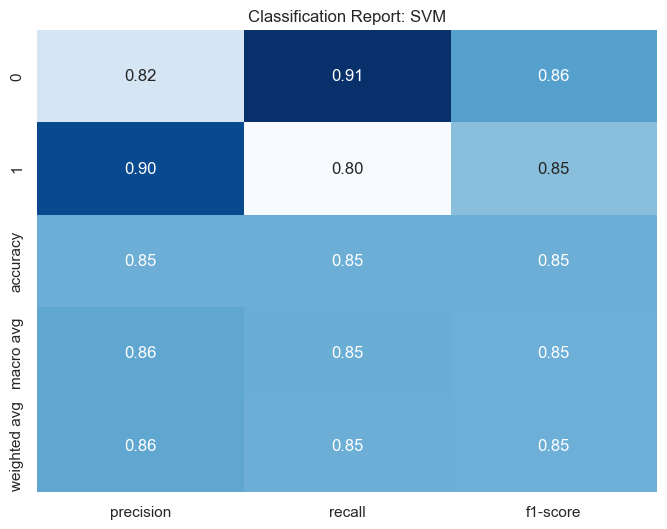

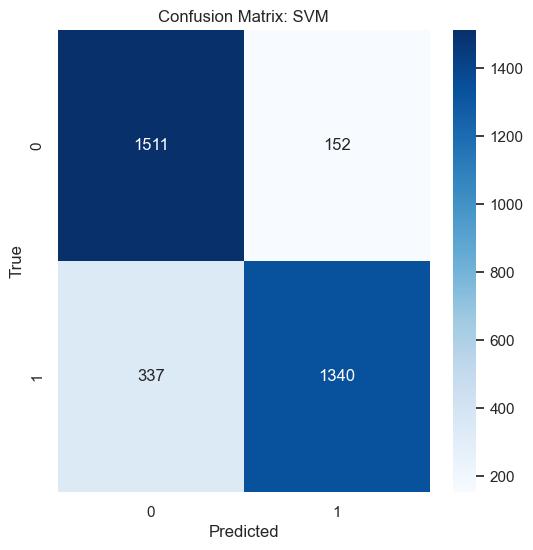

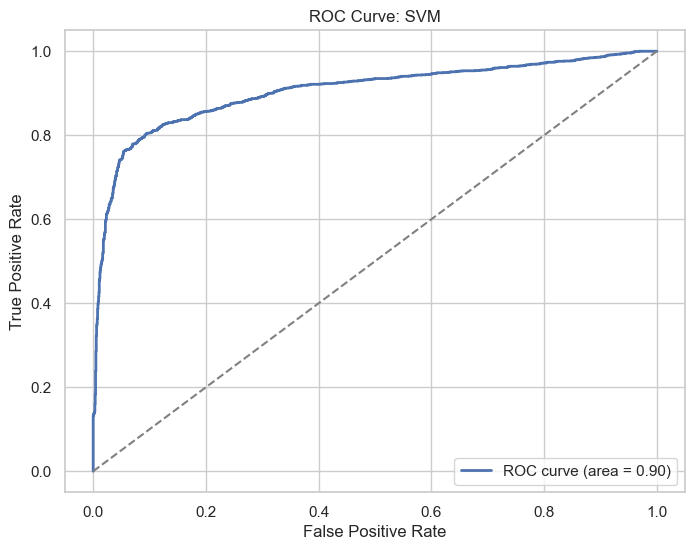

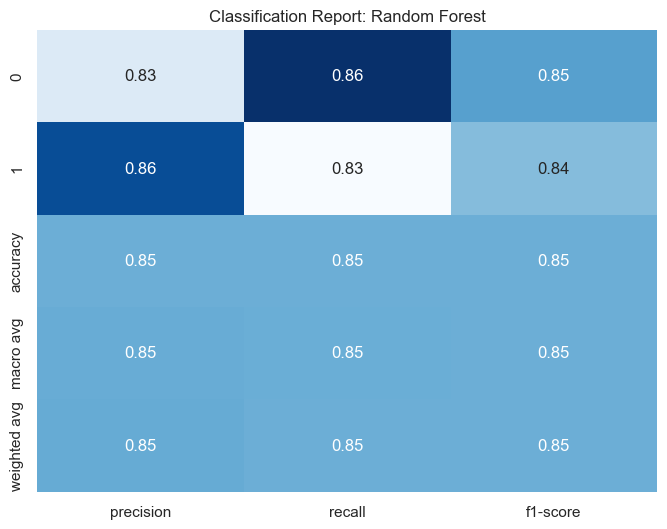

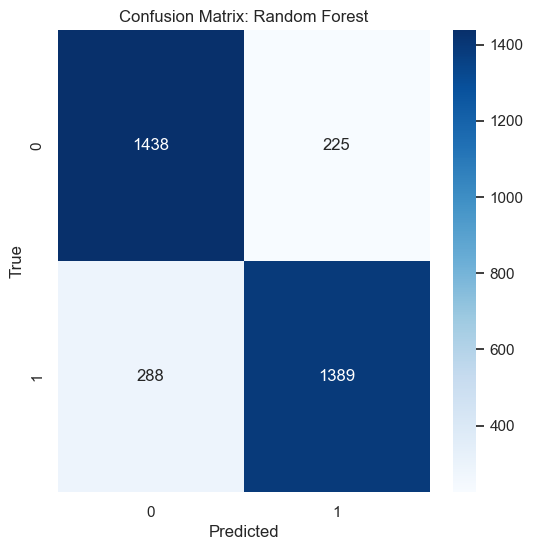

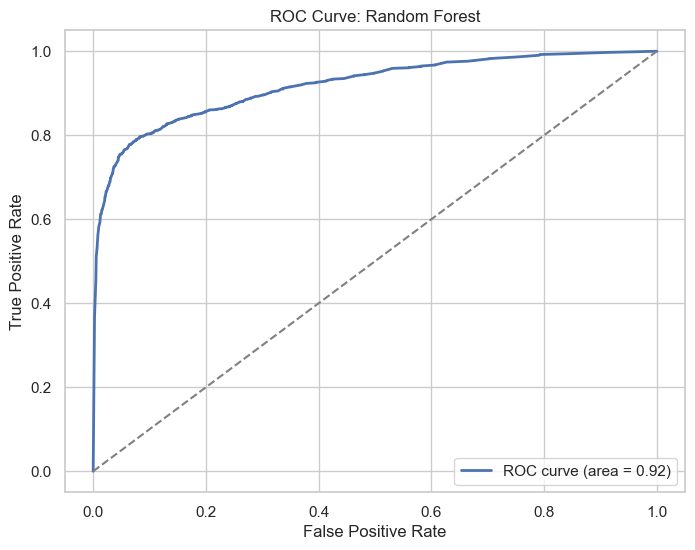

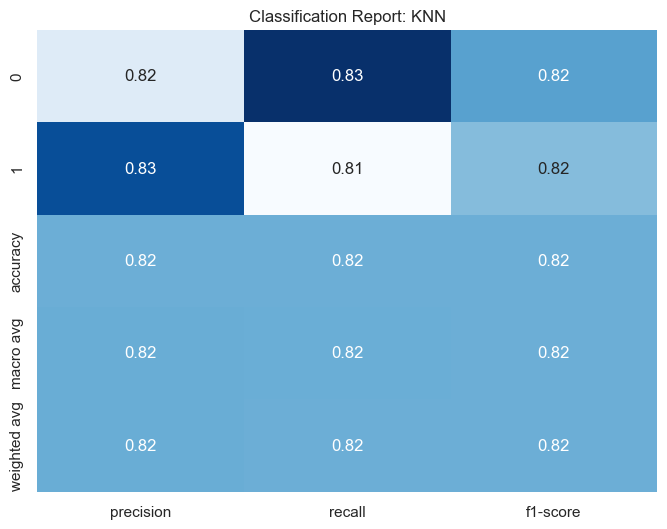

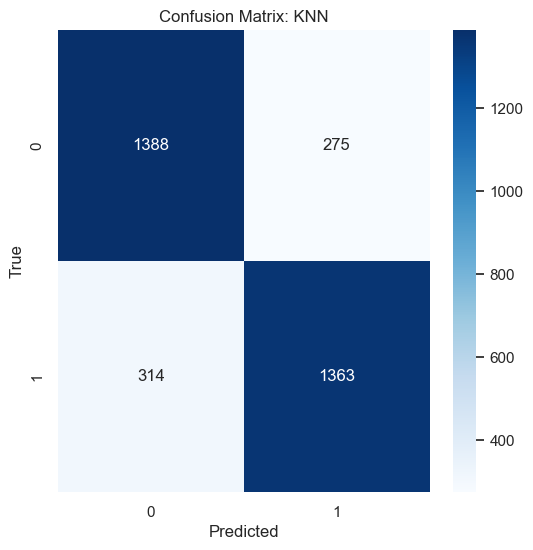

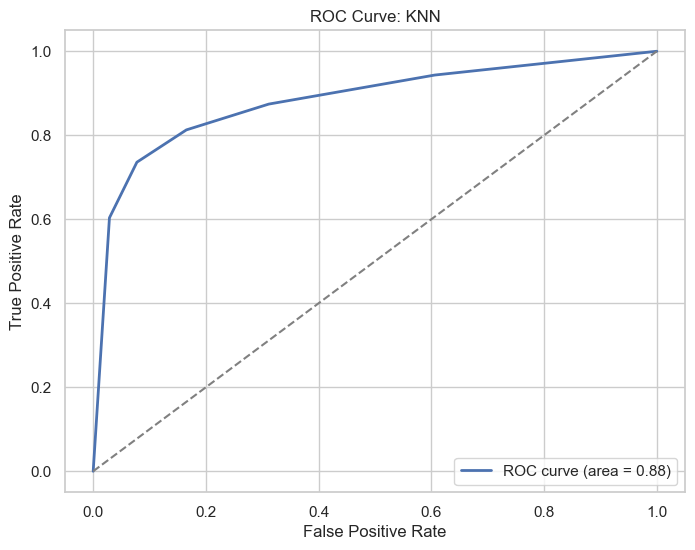

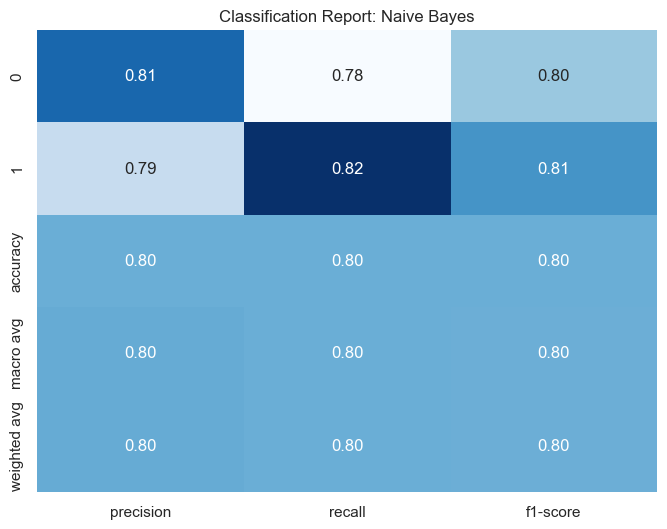

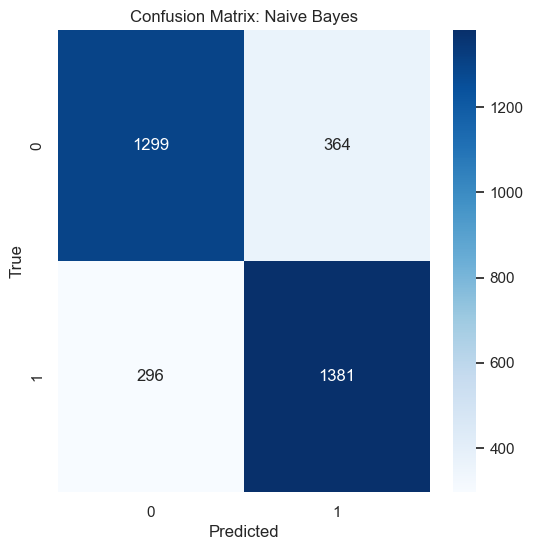

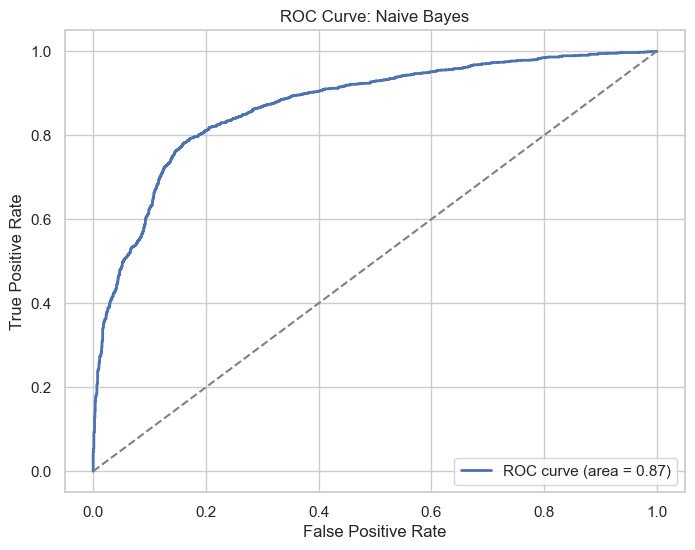

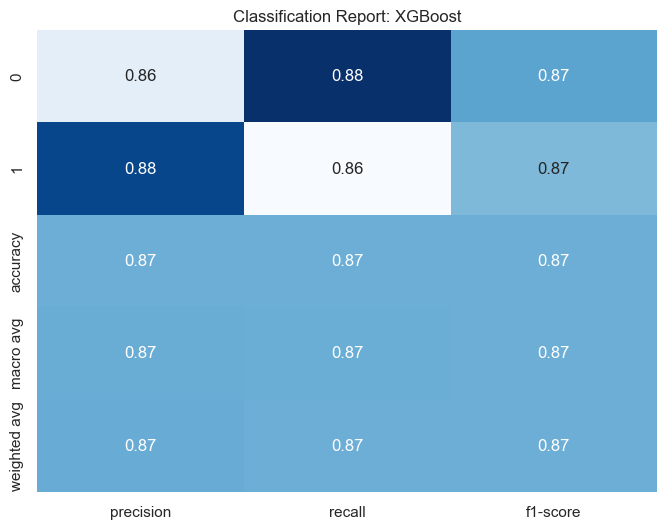

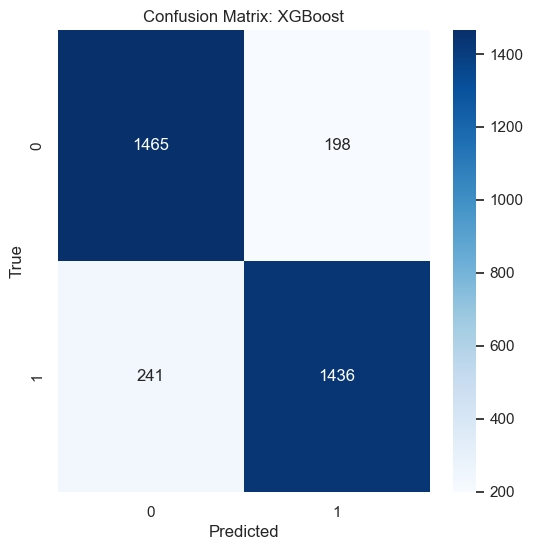

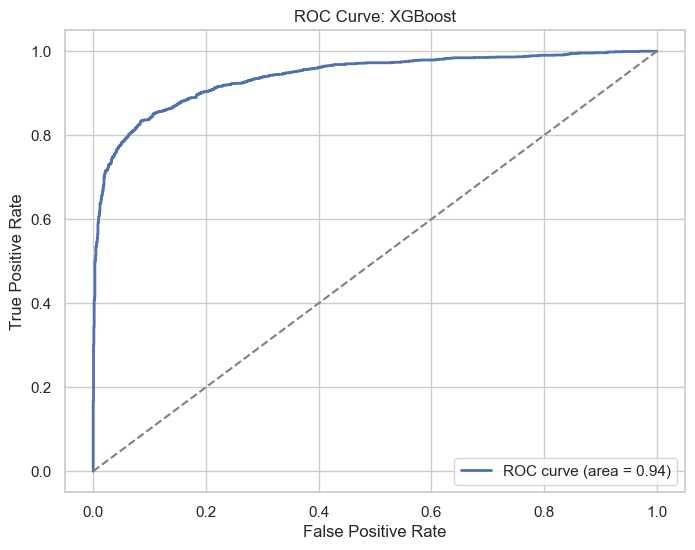

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import os

warnings.filterwarnings("ignore")

# Ensure the directory for saving images exists
if not os.path.exists("model_reports"):
    os.makedirs("model_reports")

# Replace with your actual data
selected_features = ['person_income', 'person_home_ownership', 'person_emp_length',
                     'loan_grade', 'loan_amnt', 'loan_percent_income', 'cb_person_default_on_file']
target_column = 'loan_status'

X = data_to_train[selected_features]
y = data_to_train[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results = {}

for name, model in models.items():
    print(f"\nTraining Model: {name}")
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    
    print("Classification Report for Test Set:")
    print(classification_report(y_test, y_test_pred))
    
    results[name] = {"Train Accuracy": train_acc, "Test Accuracy": test_acc}

    # Classification Report Image
    classification_rep = classification_report(y_test, y_test_pred, output_dict=True)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(classification_rep).iloc[:-1, :].T, annot=True, cmap='Blues', cbar=False, fmt='.2f')
    ax.set_title(f"Classification Report: {name}")
    fig.savefig(f"model_reports/{name}_classification_report.png")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    ax.set_title(f"Confusion Matrix: {name}")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    fig.savefig(f"model_reports/{name}_confusion_matrix.png")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax.set_title(f"ROC Curve: {name}")
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    fig.savefig(f"model_reports/{name}_roc_curve.png")

print("\nModel Performance Summary:")
for model_name, accuracy in results.items():
    print(f"{model_name}: Train Accuracy = {accuracy['Train Accuracy']:.4f}, Test Accuracy = {accuracy['Test Accuracy']:.4f}")


## Model Accuracy Comparison: Train vs Test Performance

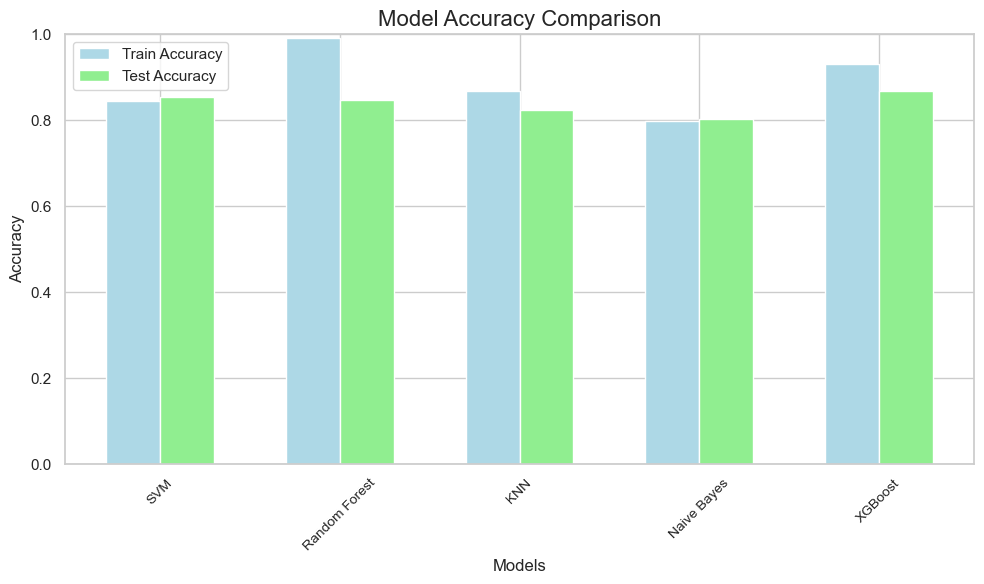

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = list(results.keys())
train_accuracies = [results[model]['Train Accuracy'] for model in model_names]
test_accuracies = [results[model]['Test Accuracy'] for model in model_names]

x = range(len(model_names))

plt.figure(figsize=(10, 6))
width = 0.3  

plt.bar(x, train_accuracies, width=width, label="Train Accuracy", color="lightblue")
plt.bar([i + width for i in x], test_accuracies, width=width, label="Test Accuracy", color="lightgreen")

plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks([i + width / 2 for i in x], model_names, rotation=45, fontsize=10)
plt.ylim(0, 1) 
plt.tight_layout()

plt.legend()

plt.show()
